# PHAS0056 exercise 1: Curve Fitting

## 1. Introduction

This notebook includes examples of curve fitting using Python, the numpy library and the stochastic gradient descent method. We will first define a function that creates a polynomial with added noise, before defining a function that calculates the gradient of this polynomial. We will then use these functions in a stochastic descent algorithm to fit a first order polynomial, before trying to fit some third order polynomial data using polynomials of different orders. Finally, we will discuss the results of our fits.

##  2. A little background

$\chi^2$  is a value that is often used in data analysis to fit a curve to a set of data point. It is defined as
$$ \chi^2 = \sum_i^N \left( \frac{f(x_i;\theta) - \tilde{f}}{\sigma} \right)^2 $$
where where $\tilde{f}$ corresponds to the actual distribution of data that we are studying, and ${f}$ is the fit function that we are trying to optimise. The final goal is to determine the parameters $\theta$ that will minimise the value of $\chi^2$: these parameters $\theta$ will correspond to our best fit.

In machine learning, $\chi^2$ is particularly useful when used to perform what is called a stochastic gradient descent. Indeed we have: $$ \left< \frac{\partial \chi^2}{\partial \theta} \right> \propto \left< f(x_i;\theta) -\tilde{f}\right> \frac{\partial f}{\partial \theta} = \left< \Delta f\right> \frac{\partial f}{\partial \theta} $$

Knowing  $ \theta_{i}$, we can then calculate the next value $ \theta_{i+1}$, using:

$$ \theta_{i+1} = \theta_{i} - \eta_i  \left< \Delta f\right> \frac{\partial f}{\partial \theta} $$
where $\eta_i$ is called the learning rate and corresponds to the step between a value of $\theta$ and the following one. [1]

## 3. Writing our functions

We start by importing the modules and libraries that will be needed for the task:

In [113]:
import numpy as np   # imports numpy
import matplotlib.pyplot as plt # imports matplotlib
import random  # imports random

We can now define a function that creates a polynomial with x values, parameters $\theta$ and added Gaussian noise with a standard deviation $\sigma$:

In [114]:
def polyModelWithNoise(x,theta,sigma):
    '''This function takes in three parameters: 
    "x" is a numpy array of x values
    "theta" is an array containing the parameters of the polynomials
    "sigma" is the standard deviation of the noise distribution added 
    to the polynomial function
    
    This function the returns a 1D array called "y"
    "y" contains x polynomials with "theta" parameters and added Gaussian noise'''
    
    y = np.zeros(len(x)) # initialises y as an array of len(x) zeros
    
    for i in range(len(x)):   # For i from 0 to the number of x values -1...
                              # of parameters...
        for j in range(len(theta)):
        
            y[i] = y[i] + theta[j]*(x[i]**j)   # ... the polynomial is updated.
    
    for k in range(len(x)):
        y[k] = y[k] + random.gauss(0,sigma)  # adds Gaussian noise to our result
    
    return y

We use the function we have defined to plot a sample or 100 points linearly arranged between 0 and 1. We use $\theta$ = [0,1] and $\sigma$ = 0.5:

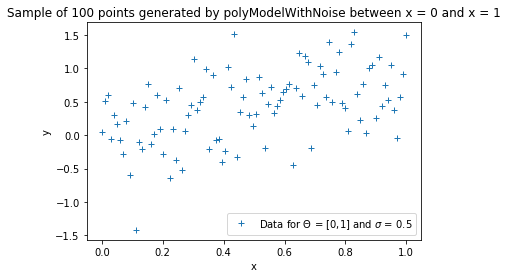

In [164]:
x_values = np.linspace(0,1,100)   # generates 100 points linearly arranged
                                  # between 0 and 1
sigma_value = 0.5     # assigns a value to the noise sigma
theta_values = np.array([0,1]) # assigns values to the parameters theta

y_values = polyModelWithNoise(x_values,theta_values,sigma_value)  # calulates
                                                                  # 100 polynomials


plt.figure()   # new plot   
plt.plot(x_values, y_values, "+", label = "Data for $\Theta$ = [0,1] and $\sigma$ = 0.5")    # plots y_values against
                                                                                            # x_values
plt.title("Sample of 100 data points generated by polyModelWithNoise between x = 0 and x = 1")  # title of the plot
plt.xlabel("x")   # title of the x axis
plt.ylabel("y")   # title of the y axis
plt.legend(loc="best")

We observe a linear repartition of the data, modified by the addition of the Gaussian noise, as expected.

We define another function that returns the gradient of the polynomial function we have just created with respect to the parameters $\theta$:

In [116]:
def polyGradient(x,theta):
    
    '''This function takes in two parameters: 
    "x" is a numpy array of x values
    "theta" is an array containing the parameters of the polynomials
    
    This function the returns a 2D array called "grad".
    "grad" is the gradient of the polynomial functions with respect 
    to the parameters theta.
    '''
    
    format = (len(x),len(theta))
    grad = np.zeros(format)  # creates an array containing as many zeros
                             # as there are x values and theta parameters
        
    for i in range(len(x)):         # For i from 0 to the number of x values -1...
        for j in range (len(theta)):  # ... and for j from 0 to the number of theta parameters -1...
        
            grad [i][j] = x[i]**j     # ...the value of the gradient is updated.
        
    return grad

## 4. Implementing a stochastic gradient descent algorithm for a first degree polynomial

We are now ready to implement the stochastic gradient descent method, using parts of the Week1_CurveFitting_notebook script: [1]

In [167]:
def get_avg_chisq(x, theta):
    '''Gets two parameters:
    array "x" and array "theta"
    
    Returns the average chi squared"'''
    return np.average((polyModelWithNoise(x, theta, 0.5)-true_polyModel(x))**2)

numSteps = 99 # number of steps
theta=[-1,0.5] # Intial theta parameters
learning_rate = 0.5 # learning rate

for i in range(numSteps):
    x_values = np.zeros(10)   # initialises x_values2 as an array of 10 zeros
    
    for j in range(10):  
        x_values[j] = random.random()    # creates a sample of 10 random values
                                          # between 0 and 1 
    chiSq=get_avg_chisq(x_values,theta)

    #Work out difference to true function
    deviation=polyModelWithNoise(x_values,[0,1],0.5)-polyModelWithNoise(x_values, theta, 0)
    #Now work out where do go next
    theta-=learning_rate*np.average(deviation[None,:]*polyGradient(x_values,theta),axis=1)
    thetaArray[i+1]=theta

ValueError: operands could not be broadcast together with shapes (1,10) (10,2) 

## 5. Fitting a third order polynomial

Our next step is to define a third degree polynomial with parameters $\theta$ = [0,1,2,2] and the same noise we used before. We first try to fit this data using a first order polynomial:

In [148]:
numSteps = 99
theta=[-1,0.5] # Intial theta parameters for a 1st order polynomial
learning_rate = 0.5 # learning rate

for i in range(numSteps):
    x_values = np.zeros(10)   # initialises x_values as an array of 10 zeros
    
    for j in range(10):  
        x_values[j] = random.random()    # creates a sample of 10 random values
                                          # between 0 and 1 
    chiSq=get_avg_chisq(x_values,theta)

    #Work out difference to true function
    deviation=polyModelWithNoise(x_values,[0,1,2,2],0.5)-polyModelWithNoise(x_values, theta, 0)
    #Now work out where do go next
    theta-=learning_rate*np.average(deviation[None,:]*polyGradient(x_values,theta),axis=1)
    thetaArray[i+1]=theta

TypeError: polyModelWithNoise() missing 1 required positional argument: 'sigma'

We now try to fit the same polynomial using a third order polynomial:

In [145]:
numSteps = 99
theta=[-1,0.5,0.5,0.5] # Intial theta parameters for a 3rd order polynomial
learning_rate = 0.5 # learning rate

for i in range(numSteps):
    x_values = np.zeros(10)   # initialises x_values as an array of 10 zeros
    
    for j in range(10):  
        x_values[j] = random.random()    # creates a sample of 10 random values
                                          # between 0 and 1 
    chiSq=get_avg_chisq(x_values,theta)

    #Work out difference to true function
    deviation=polyModelWithNoise(x_values,[0,1,2,2],0.5)-polyModelWithNoise(x_values, theta, 0)
    #Now work out where do go next
    theta-=learning_rate*np.average(deviation[None,:]*polyGradient(x_values,theta),axis=1)
    thetaArray[i+1]=theta

ValueError: operands could not be broadcast together with shapes (1,10) (10,4) 

The same polynomial is now fitted to a 7th order using a seventh order polynomial:

In [150]:
numSteps = 99
theta=[-1,0.5,0.5,0.5,0.5,0.5,0.5,0.5] # Intial theta parameters for a 1st order polynomial
learning_rate = 0.5 # learning rate

for i in range(numSteps):
    x_values = np.zeros(10)   # initialises x_values as an array of 10 zeros
    
    for j in range(10):  
        x_values[j] = random.random()    # creates a sample of 10 random values
                                          # between 0 and 1 
    chiSq=get_avg_chisq(x_values,theta)

    #Work out difference to true function
    deviation=polyModelWithNoise(x_values,[0,1,2,2],0.5)-polyModelWithNoise(x_values, theta, 0)
    #Now work out where do go next
    theta-=learning_rate*np.average(deviation[None,:]*polyGradient(x_values,theta),axis=1)
    thetaArray[i+1]=theta

ValueError: operands could not be broadcast together with shapes (1,10) (10,8) 

## 6. Plotting the third order polynomial data

We plot our third order polynomial data from x = -0.5 to x = 1.5: 

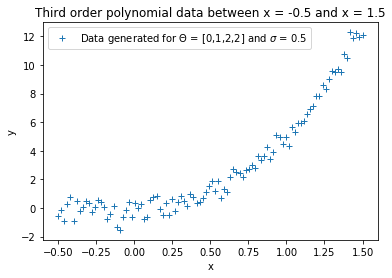

In [165]:
x_values_plot = np.linspace(-0.5,1.5,100)   # generates 100 points 
                                            # linearly arranged between 0.5 
                                            # and 1.5
                                  
sigma_value = 0.5     # assigns a value to the noise sigma
theta_3rd_order = np.array([0,1,2,2]) # assigns values to the parameters theta

y_values_plot = polyModelWithNoise(x_values_plot,theta_3rd_order,sigma_value) # calulates 100 y values


plt.figure()   # new plot  

plt.plot(x_values_plot, y_values_plot, "+",  label = "Data generated for $\Theta$ = [0,1,2,2] and $\sigma$ = 0.5") # plots data                               
plt.title("Third order polynomial data between x = -0.5 and x = 1.5")  # title of the plot
plt.xlabel("x")   # title of the x axis
plt.ylabel("y")   # title of the y axis
plt.legend(loc="best")

## 7. Discussion

## 8. Conclusion

## 9. References

[1] PHAS0056: Practical Machine Learning for Physicists, Week1_CurveFitting_notebook, Ryan Nichol, https://colab.research.google.com/github/nichol77/mlForPhysicists/blob/master/Week1/Week1_CurveFitting.ipynb, accessed 19/10/2020